In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Get the data
file_1 = ("raw_data/clinicaltrial_data.csv")
file_2 = ("raw_data/mouse_drug_data.csv")

ctd = pd.read_csv(file_1)
md = pd.read_csv(file_2)


In [4]:
# check for dups in file_2
md.shape

(250, 2)

In [5]:
dups = md[md.duplicated(keep = False)]
print(dups)

Empty DataFrame
Columns: [Mouse ID, Drug]
Index: []


In [9]:
# Create relationship
join_csv = ctd.merge(md, on = "Mouse ID")

In [10]:
join_csv.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [22]:
join_csv.shape

(1906, 5)

In [16]:
join_csv.Drug.unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'], dtype=object)

In [20]:
# Capomulin, Infubinol, Ketapril, and Placebo

data = join_csv[(join_csv["Drug"] == 'Capomulin') |
                      (join_csv["Drug"] == 'Infubinol') |
                      (join_csv["Drug"] == 'Ketapril') |
                      (join_csv["Drug"] == 'Placebo')
                     ]

In [21]:
data.shape

(777, 5)

In [23]:
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [24]:
# find the mean for each point in time by the respective Drug
volAvg = pd.DataFrame(data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])

In [30]:
volAvg.shape

(40, 1)

In [31]:
volAvg.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

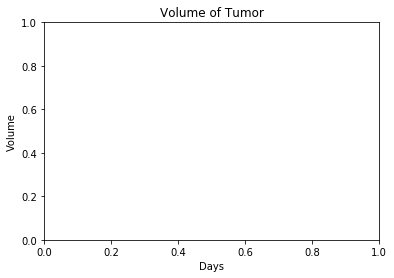

In [61]:
plt.title("Volume of Tumor")
plt.xlabel("Days")
plt.ylabel("Volume")
plt.show()